<a href="https://colab.research.google.com/github/Skunhter/Trabalho-Mofologia/blob/main/Morfologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí<br>
Escola do Mar, Ciência e Tecnologia<br>
Professor Felipe Viel

# Exemplo Morfologia

### Tutoriais da OpenCV

- https://docs.opencv.org/master/d9/df8/tutorial_root.html
- https://www.geeksforgeeks.org/opencv-python-tutorial/

In [1]:
#from https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html
#Importando as bibliotecas Open CV e Numpy para conseguir utiliza-las no código.
import cv2
import numpy as np
#caso for usar o Google Colab com a OpenCV, usar a lib abaixo
from google.colab.patches import cv2_imshow


In [7]:
#Essa 3 primeiras linhas estão lendo as respectivas imagens definidas dentro dos parenteses e colocando cada uma em sua variável.
img = cv2.imread('j.png',0)
img_opening = cv2.imread('j_ruido.png',0)
img_closing = cv2.imread('j_furos.png',0)
#O .shape está acessando a quantidade de colunas e linhas que a imagem possui, 
#caso esta a imagem seja grayscale ela irá devover um valor inteiro, caso seja colorida ela irá devolver de forma ordenada.
#Quando é devolvido a quantidade de colunas e linhas, 
#esse resultado é então colocando em altura e largura da img que foi uma das variáveis definidas no começo do código.
altura, largura = img.shape

#Nesta parte do código está sendo feito um novo array com a função np.ones, 
#que realiza um array com números 1 na quantidade de linhas e colunas que o usuário coloca neste caso (5, 5).
#A próxima linhas np.uint8 está definindo o tipo de data que é int e a quantidade de bytes, neste caso 8 e este valor está sendo colocado na variável Kernel
kernel = np.ones((5,5),np.uint8)
#Está mostrando ao usuário a nova variável que foi realizada acima.
print(kernel)

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [8]:
#Esta primeira linha irá corroer uma imagem, ela irá pegar a varíavel que é a img, um elemento de estrutura que chamamos de Kernel.
#E itiretarions que será a quantidade de vezes que a imagem será corroída, que neste caso são duas vezes.
#Esta função fará com que áreas brancas da imagem fiquem mais finas e áreas pretas maiores, e está nova imagem irá para a variável erosion.
erosion = cv2.erode(img,kernel,iterations = 2)
#Está linha irá dilatar a imagem, pegando valores de imagem com a variável img, o tamanho da estrutura kernel, e a quantidade de vezes que irá dilatar com iterations.
#Fazendo isso o valor que irá retornar a dilation será de uma imagem dilata, com brancos maiores e zonas pretas menores.
dilation = cv2.dilate(img,kernel,iterations = 2)

In [9]:
#Transformações morfológicas são operações baseadas no formato da imagem, que serão realizadas recebendo o valor da imagem, ou seja nossa imagem original.
#O Kernel que decidirá a naturza da operação, e variações de Erosion e Dilation, que irão utilizar das duas funções para gerar uma nova imagem.

#O primeiro exemplo, irá pegar a nossa img, e o nosso Kernel definido no começo do código, 
#e irá aplicar a função MORPH_GRADIENT e irá retornar o valor desta transformação a variável gradient.
#A função MORPH_GRADIENT trará como resultado a diferença entre Erosion e Dilation, 
#e trará uma linha por volta do nosso objeto principal que seria um J em branco, com seu fundo preenchido em preto
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

#O segundo exemplo opening também será uma transformação morfológica, porém desta vez iremos utilizar a img_opening e a função MORPH.OPEN.
#Esta função normalmente é utilizada para remover erros ou "noise" que a imagem pode conter, ele primeiro irá erodir a imagem, tornando suas áreas brancas mais finas,
#e neste caso até as eliminando, e pegará a área branca que sobrou e irá aumentar ao seu tamanho original novamente, tirando pequenas falhas que a imagem pode conter.
#Este valor então ficará na variável opening.
opening = cv2.morphologyEx(img_opening, cv2.MORPH_OPEN, kernel)

#O terceiro exemplo, também uma transformação morfológica, desta vez utilizando a img_closing, e a função MORPH_CLOSE.
#Essa função faz o contrário do que a última função fez, 
#ela normalmente é utilizada para tirar erros que podem conter no objeto principal ou pontos pretos que pode conter nele.
#Neste caso ele irá aumentar as áreas que são brancas, e diminuir as que são pretas, removendo os erros que podem conter dentro do objeto, e depois irá erodir,
#ou seja, diminuir novamente a imagem, retornando ela ao seu tamanho original. E então esta nova imagem será colocada na variável closing.
closing = cv2.morphologyEx(img_closing, cv2.MORPH_CLOSE, kernel)

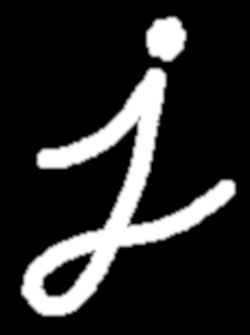

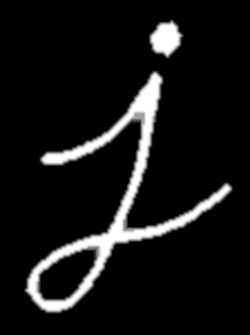

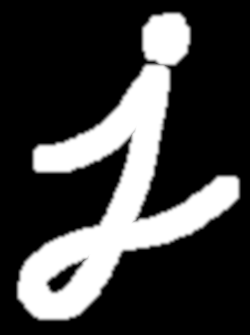

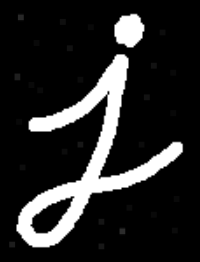

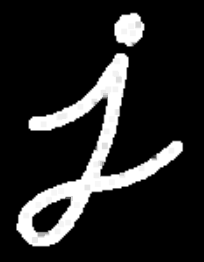

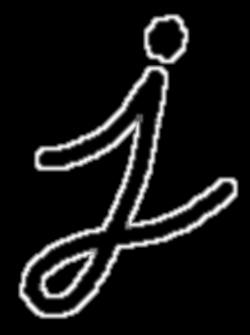

In [11]:
#Nesta parte do código o imshow serve para devolver as imagens ao usuário.,
#será pego cada variável diferente que realizamos no código e irá nos devolver como ficaram as imagens.
#Caso use o Google Colab
cv2_imshow(img)
cv2_imshow(erosion)
cv2_imshow(dilation)
cv2_imshow(opening)
cv2_imshow(closing)
cv2_imshow(gradient)